# 1.1
- Forudsige re-op for at optimere behandling
  - Inference i fokus
  - Alder, køn, BMI, rtg. billeder features, comorbiditet, sygehuset, medicin

- Indtegninger til stråleterapi
  - Prediction og Inference 
  - billeder, 
  - 
- Tumorresponse til stråleterapi
  
# 1.2
- Outlier detection til stråleterapiindtegninger
- Dimensionsreduktion
- Billedsegmentering
- 


# 2
## 4.a
Higher order linear regression will be more flexible and thus have a lower RSS than the first-order model.

## 4.b
Lower order models will have better performance on the test set, as they extrapolate better.

## 4.c
The more flexible cubic model will yield better training RSS, because we need the flexibility for the unknow relation

## 4.d
The more flexible cubic model will yield better on test RSS. Same justification as in 4.c


In [106]:
# main1a.py
# Linear regression (polynomial regression) on body density data.
# Training- and test set.
#
# PMR Mar 2024

#%% Import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

#%% Define polyExpand function
def polyExpand(X, k):
    '''Performs polynomial expansion of X as in Y = [X, X^2,...,X^k]
    X: pandas data frame
    k: polynomial order'''
    Y = X
    for n in range(2,k+1):
        XX = np.power(X,n)
        for c in XX.columns:
            XX.rename(columns={c:c+str(n)},inplace=True)
        Y = pd.concat([Y, XX], axis=1)      
    return Y


#%% Import data
dataTrain = pd.read_csv('datasets/bodyMeasurementsSingleTrain.txt')
dataTest = pd.read_csv('datasets/bodyMeasurementsSingleTest.txt')

## Extract predictors and response variables from tables into X and y
I = dataTrain.columns == 'Body_Density'; # Identify column with response variable (body density)
ytrain = dataTrain.iloc[:,I]
Xtrain = dataTrain.iloc[:,~I]

I = dataTest.columns == 'Body_Density'; # Identify column with response variable (body density)
ytest = dataTest.iloc[:,I]
Xtest = dataTest.iloc[:,~I]

#%% Run analysis
def plot(k):
    # Create an x axis with high resolution for plotting the trained model
    dum = pd.concat([Xtrain, Xtest], ignore_index=True, axis=0)
    XHighRes = pd.DataFrame(np.linspace(dum.min(), dum.max(), 1000), columns=Xtrain.columns)

    # Create polynomial expansion of predictor variables
    XtrainPol = polyExpand(Xtrain,k)
    XtestPol = polyExpand(Xtest,k)

    # Also create polynomial expansion of data used for plotting the trained model
    XhighResPol = polyExpand(XHighRes,k);

    # Scale predictor variables
    scl = XtrainPol.std()
    XtrainPol = XtrainPol/scl
    XtestPol = XtestPol/scl
    XhighResPol = XhighResPol/scl

    # Train linear regression model
    fit = LinearRegression().fit(XtrainPol, ytrain)

    # Use model to predict
    yhatTrain = fit.predict(XtrainPol)
    yhatTest = fit.predict(XtestPol)

    # Compute training and test error
    errTrain = np.power(ytrain - yhatTrain, 2).mean()
    errTest = np.power(ytest - yhatTest, 2).mean()

    #%% Plot the data, and the model predictions
    fig, ax = plt.subplots()
    ax.plot(XtrainPol.iloc[:,0], ytrain, 'o', label = 'training data')
    ax.plot(XtestPol.iloc[:,0], ytest, '.', label = 'test data')
    ax.plot(XhighResPol.iloc[:,0], fit.predict(XhighResPol), '-', label = 'fit')
    legend = ax.legend()
    ax.set_xlabel(XtrainPol.columns[0])
    ax.set_ylabel(ytrain.columns[0])
    ax.set_ylim([None, None]) # You might change y limits to zoom in
    return fig, ax, pd.DataFrame({"pol": [k, k], "ds": ["train", "test"], "err": [errTrain.iloc[0], errTest.iloc[0]]})



# 4.1
8 Observations, 1 feature 

In [90]:
print(dataTrain)

   Chest_circumference  Body_Density
0           100.460849      1.066440
1            96.446366      1.090722
2           113.381468      1.014053
3            91.581863      1.072519
4            99.943620      1.062339
5           109.275706      1.031871
6           108.742919      1.048245
7            99.572877      1.062786


In [91]:
dataTrain.min(axis=0)

Chest_circumference    91.581863
Body_Density            1.014053
dtype: float64

In [92]:
dataTrain.max(axis=0)

Chest_circumference    113.381468
Body_Density             1.090722
dtype: float64

The chest circumference ranges from 91.58 cm to 113.38 cm
Body Density ranges from 1.014 to 1.091 g/cm3

# 4.b

In [93]:
Xtrain

,Chest_circumference
0,100.460849
1,96.446366
2,113.381468
3,91.581863
4,99.943620
5,109.275706
6,108.742919
7,99.572877


This has one feature.

In [94]:
k = 7
# Create polynomial expansion of predictor variables
XtrainPol = polyExpand(Xtrain,k)
XtrainPol

,Chest_circumference,Chest_circumference2,Chest_circumference3,Chest_circumference4,Chest_circumference5,Chest_circumference6,Chest_circumference7
0,100.460849,10092.382227,1.013889e+06,1.018562e+08,1.023256e+10,1.027971e+12,1.032709e+14
1,96.446366,9301.901528,8.971346e+05,8.652537e+07,8.345058e+09,8.048505e+11,7.762491e+13
2,113.381468,12855.357255,1.457559e+06,1.652602e+08,1.873745e+10,2.124479e+12,2.408766e+14
3,91.581863,8387.237661,7.681189e+05,7.034576e+07,6.442395e+09,5.900066e+11,5.403390e+13
4,99.943620,9988.727164,9.983096e+05,9.977467e+07,9.971842e+09,9.966220e+11,9.960601e+13
5,109.275706,11941.179964,1.304881e+06,1.425918e+08,1.558182e+10,1.702714e+12,1.860653e+14
6,108.742919,11825.022454,1.285887e+06,1.398312e+08,1.520565e+10,1.653507e+12,1.798071e+14
7,99.572877,9914.757857,9.872410e+05,9.830242e+07,9.788255e+09,9.746447e+11,9.704818e+13


one feature is added per order higher than one

There are now 8 features

In [95]:
XtrainPol.agg(["min", "max"])

,Chest_circumference,Chest_circumference2,Chest_circumference3,Chest_circumference4,Chest_circumference5,Chest_circumference6,Chest_circumference7
min,91.581863,8387.237661,7.681189e+05,7.034576e+07,6.442395e+09,5.900066e+11,5.403390e+13
max,113.381468,12855.357255,1.457559e+06,1.652602e+08,1.873745e+10,2.124479e+12,2.408766e+14


# 2.4.c
Makes sense to rescale, to make data more comprehenable and on comparable scale.

# 2.4.e
This is a mean squared error between  actual values and hat-values


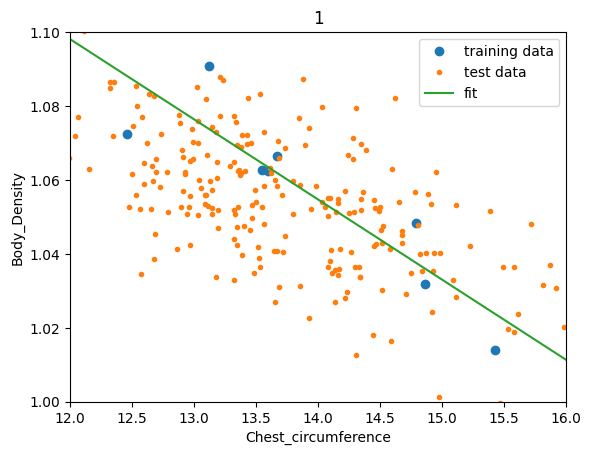

<Figure size 640x480 with 0 Axes>

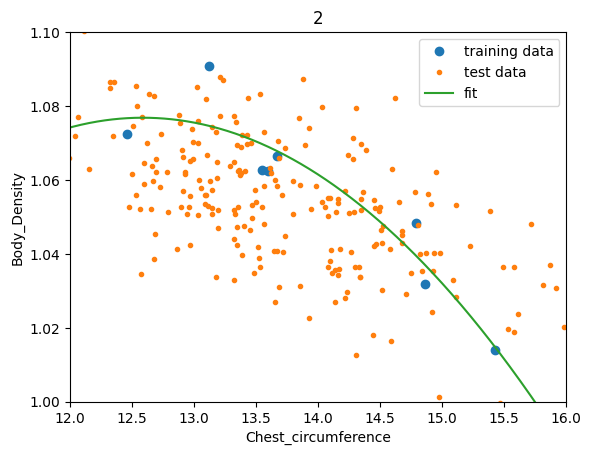

<Figure size 640x480 with 0 Axes>

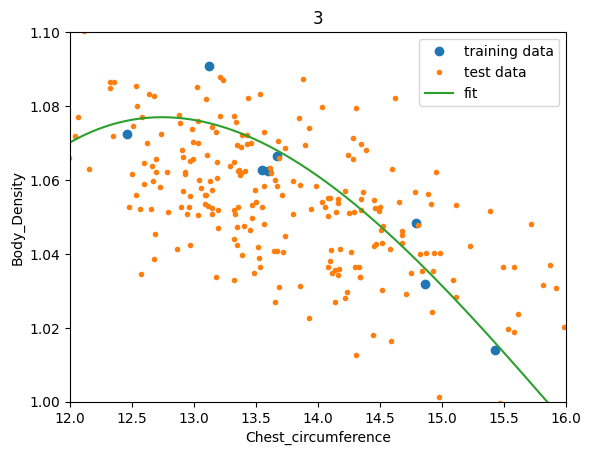

<Figure size 640x480 with 0 Axes>

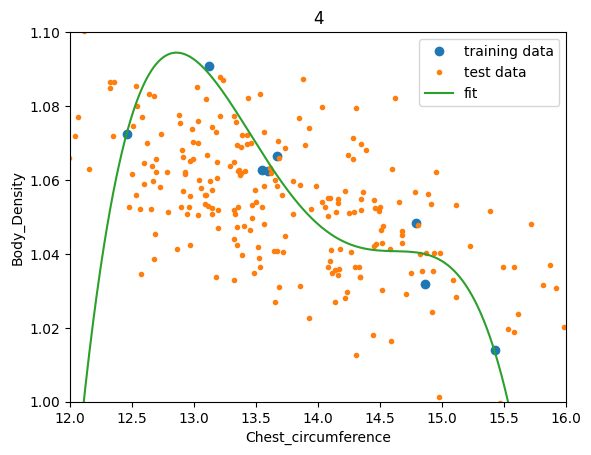

<Figure size 640x480 with 0 Axes>

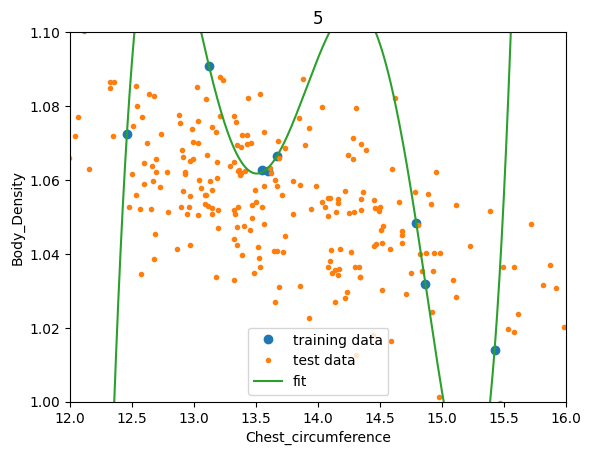

<Figure size 640x480 with 0 Axes>

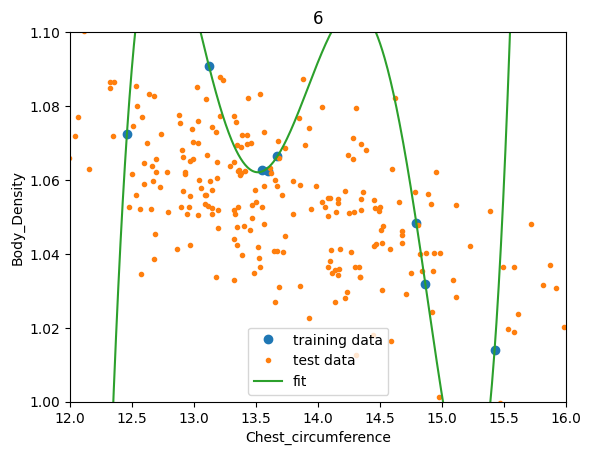

<Figure size 640x480 with 0 Axes>

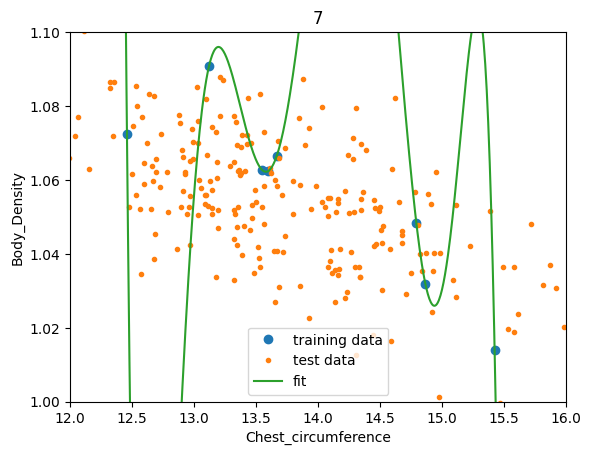

<Figure size 640x480 with 0 Axes>

In [107]:
dfs = []
for k in range(1,8):
    fig, ax, err = plot(k)
    ax.set_title(k)
    ax.set_xlim([12,16])
    ax.set_ylim([1,1.1])

    plt.show()
    dfs.append(err)
    plt.clf()

In [108]:
dfs

[   pol     ds       err
 0    1  train  0.000098
 1    1   test  0.000336,
    pol     ds       err
 0    2  train  0.000059
 1    2   test  0.000413,
    pol     ds       err
 0    3  train  0.000059
 1    3   test  0.000464,
    pol     ds       err
 0    4  train  0.000023
 1    4   test  0.041775,
    pol     ds           err
 0    5  train  1.818859e-07
 1    5   test  7.715585e+00,
    pol     ds           err
 0    6  train  1.605274e-07
 1    6   test  4.971765e+00,
    pol     ds           err
 0    7  train  2.579550e-14
 1    7   test  1.756601e+04]

In [110]:
err_df = pd.concat(dfs)
err_df

,pol,ds,err
0,1,train,9.783850e-05
1,1,test,3.363816e-04
0,2,train,5.942656e-05
1,2,test,4.129855e-04
0,3,train,5.884494e-05
1,3,test,4.641982e-04
0,4,train,2.318943e-05
1,4,test,4.177533e-02
0,5,train,1.818859e-07
1,5,test,7.715585e+00


In [100]:
import seaborn as sns

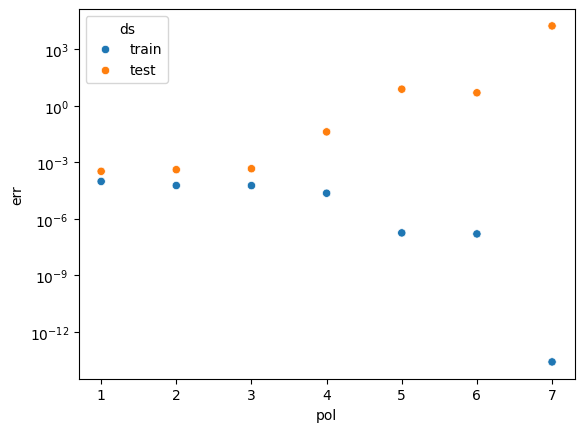

In [114]:
sns.scatterplot(x="pol", y="err", data=err_df, hue="ds")
plt.yscale('log')